In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import statsmodels

In [2]:
df = pd.read_csv("bank-additional-full.csv", sep = ";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df = df.replace("unknown", np.NaN)

In [4]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
le = LabelEncoder()

df["job"] = le.fit_transform(df["job"])
df["marital"] = le.fit_transform(df["marital"])
df["education"] = le.fit_transform(df["education"])
df["default"] = le.fit_transform(df["default"])
df["housing"] = le.fit_transform(df["housing"])
df["loan"] = le.fit_transform(df["loan"])
df["contact"] = le.fit_transform(df["contact"])
df["month"] = le.fit_transform(df["month"])
df["day_of_week"] = le.fit_transform(df["day_of_week"])
df["poutcome"] = le.fit_transform(df["poutcome"])


## Splitting the data into training and testing set

In [8]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 1)

## Training phase

In [10]:

dc = DecisionTreeClassifier(max_depth=3,criterion="entropy")
dc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

## Accuracy

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
yp = dc.predict(X_test)
print(confusion_matrix(y_test, yp))
print("\n",accuracy_score(y_test, yp))

[[7668  313]
 [ 642  524]]

 0.8955941838854269


Tree Visualisation

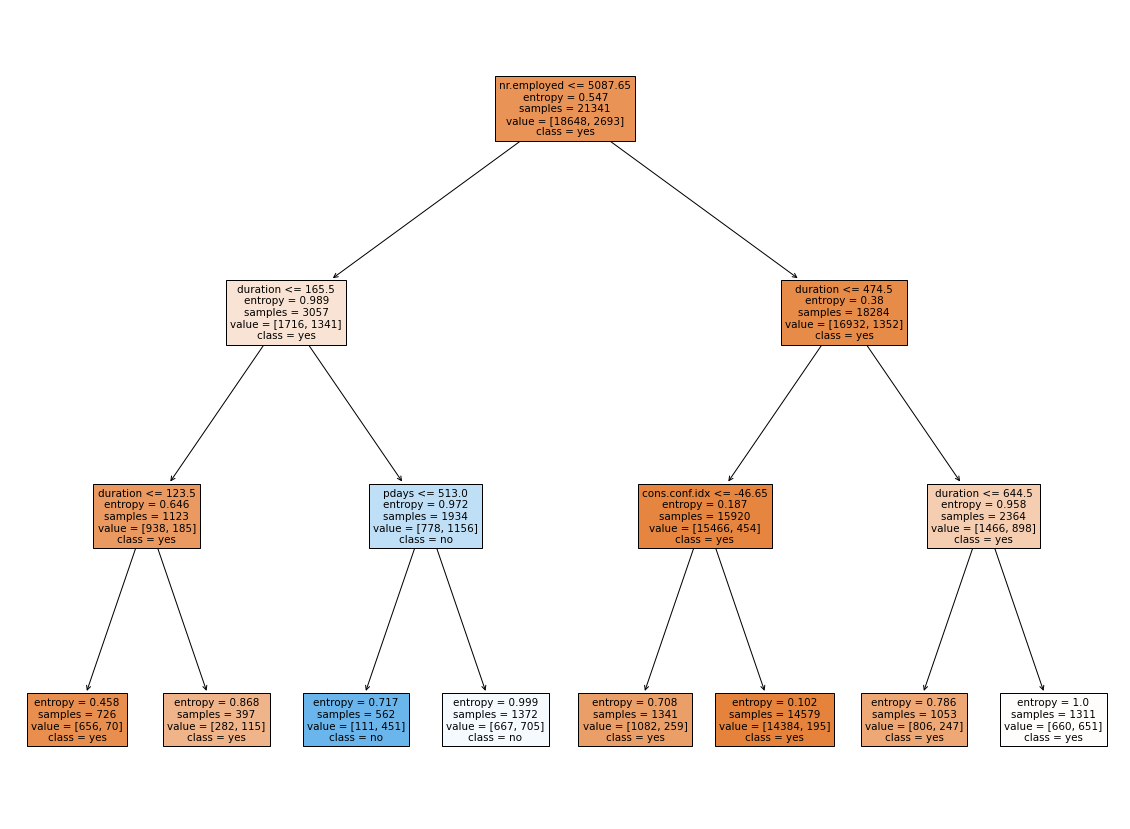

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(dc,
          feature_names= df.drop('y', axis=1).columns,  
          class_names= ['yes','no'],
          filled=True)
plt.show()

Infernce:
    Based on information gain and entropy The nodes have been further derieved.Depth has been limited to 3 as, if depth is not mentioned 
    ,depth will be used as 21 ,as there are 21 features.Here nr.employed is the root node.We are using entrophy we can say 
    that randomness is less with classification.We can observe the split in the number of samples is evenly done at the level two 
    which suggests that the model is not baised at any levels. With the increase int the height of the tree accuracy is increasing this 
    means we are including more nodes and more features.

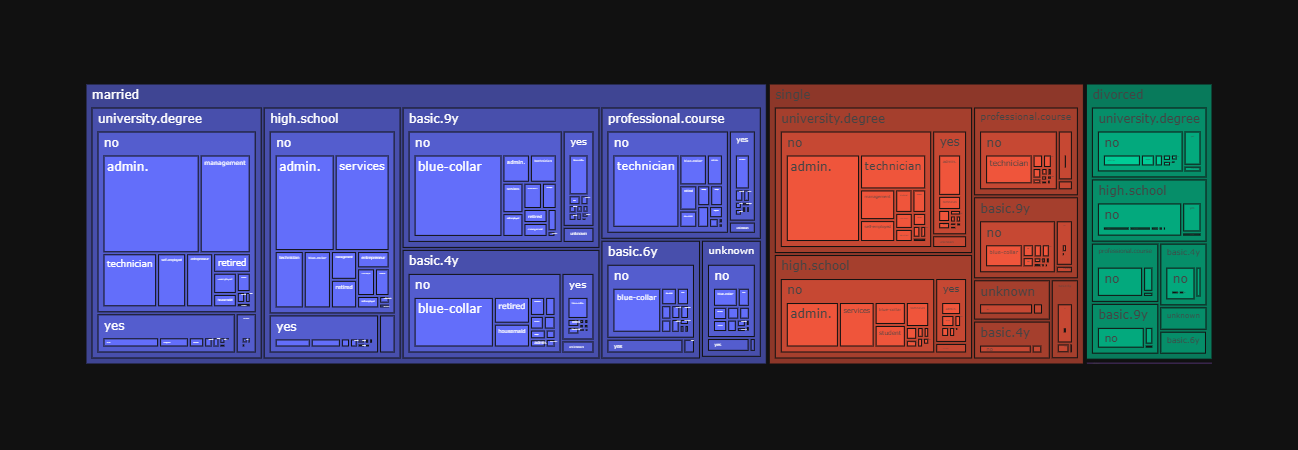

In [49]:
d = pd.read_csv("bank-additional-full.csv", sep = ";")
import plotly.express as px
fig = px.treemap(d,path=['marital', 'education', 'loan',"job"],template="plotly_dark")
fig.show()


INFERENCE:
    Our data has more people who are married. people who got divorced is comparitively less. 
    considering married we can find the admin class 
    people exist more in university degree and high school classes. 
    while the blucoller is majorly lies in the classes basic6y and basic 6y,9y,4y in married class.

Ques 3

In [15]:
pd.crosstab([d.loan,d.marital],[d.education,d.housing])

education        basic.4y               basic.6y              basic.9y  \
housing                no unknown   yes       no unknown  yes       no   
loan    marital                                                          
no      divorced      195       0   213       67       0   83      226   
        married      1303       0  1356      726       0  750     1654   
        single        181       0   182      131       0  140      487   
        unknown         3       0     2        5       0    0        4   
unknown divorced        0       7     0        0       8    0        0   
        married         0      92     0        0      38    0        0   
        single          0      17     0        0      14    0        0   
        unknown         0       1     0        0       0    0        0   
yes     divorced       31       0    43       13       0   11       27   
        married       214       0   263      107       0  146      259   
        single         28       0    45       20       0   32       86   
        unknown         0       0     0        1       0    0        0   

education                      high.school  ... illiterate  \
housing          unknown   yes          no  ...        yes   
loan    marital                             ...              
no      divorced       0   253         472  ...          0   
        married        0  1795        2046  ...          7   
        single         0   589        1242  ...          1   
        unknown        0     3           7  ...          0   
unknown divorced      16     0           0  ...          0   
        married      101     0           0  ...          0   
        single        34     0           0  ...          0   
        unknown        0     0           0  ...          0   
yes     divorced       0    43          83  ...          0   
        married        0   347         321  ...          2   
        single         0   120         192  ...          0   
        unknown        0     1           0  ...          0   

education        professional.course               university.degree          \
housing                           no unknown   yes                no unknown   
loan    marital                                                                
no      divorced                 233       0   305               526       0   
        married                 1211       0  1376              2441       0   
        single                   527       0   668              1631       0   
        unknown                    2       0     3                18       0   
unknown divorced                   0      20     0                 0      37   
        married                    0      67     0                 0     151   
        single                     0      38     0                 0      89   
        unknown                    0       0     0                 0       0   
yes     divorced                  38       0    61                81       0   
        married                  194       0   308               403       0   
        single                    74       0   117               287       0   
        unknown                    1       0     0                 0       0   

education              unknown               
housing            yes      no unknown  yes  
loan    marital                              
no      divorced   582      89       0   69  
        married   2800     448       0  441  
        single    1954     180       0  215  
        unknown      9       3       0    4  
unknown divorced     0       0       6    0  
        married      0       0      21    0  
        single       0       0      13    0  
        unknown      0       0       0    0  
yes     divorced   111       9       0   14  
        married    599      56       0   88  
        single     445      31       0   42  
        unknown      4       0       0    2  

[12 rows x 23 columns]

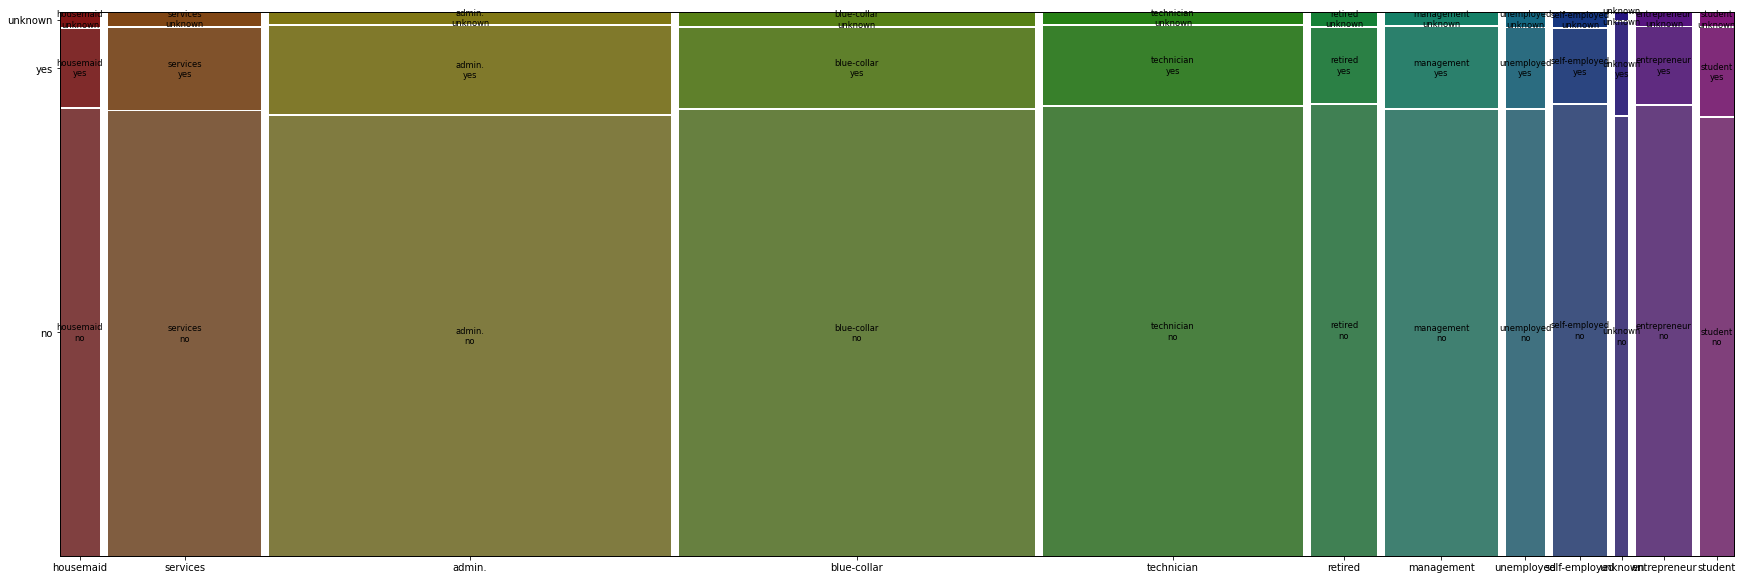

In [47]:
plt.rcParams['figure.figsize'] = (30,10)
mosaic(d,["job","loan"])
plt.show()